In [1]:
import pandas as pd
from sqlalchemy import create_engine, types, text

In [2]:
host_name="localhost"
db_user="admin"
db_password="admin"
db_name="trial"
postgres_engine = create_engine(f'postgresql+psycopg2://{db_user}:{db_password}@{host_name}/{db_name}')
warehouse = pd.read_sql(f'SELECT * FROM public.warehouse',postgres_engine)

In [3]:
warehouse

,campaign_id,game_key,type,width,height,creative_id,auction_id,browser_ts,geo_country,site_name,...,cost_centre,currency,buy_rate_cpe,volume_agreed,gross_costbudget,agency_fee,percentage,flat_fee,net_cost,row_num
0,l5kk3r3,adunit-facebook-conversational-commerce-phase-...,impression,%,%,x83byc8a,fd74243f-6606-4830-a0ef-dd12f66ec6f5,2021-01-01 19:55:20.291000+00:00,Thailand,www.wuxiaworld.com,...,SGP,USD,0.28,242185.0,67811.8,Percentage,15.0,None,57640.03,1
1,l5kk3r3,adunit-facebook-conversational-commerce-phase-...,impression,%,%,x83byc8a,fd74243f-6606-4830-a0ef-dd12f66ec6f5,2021-01-01 19:55:20.298000+00:00,Thailand,www.wuxiaworld.com,...,SGP,USD,0.28,242185.0,67811.8,Percentage,15.0,None,57640.03,1
2,l5kk3r3,adunit-facebook-conversational-commerce-phase-...,impression,%,%,tf2htrrm,b3af878b-fd1a-4c6f-91a2-4e3670d2fda5,2021-01-05 00:21:39.693000+00:00,Thailand,www.prachachat.net,...,SGP,USD,0.28,242185.0,67811.8,Percentage,15.0,None,57640.03,1
3,l5kk3r3,adunit-facebook-conversational-commerce-phase-...,impression,%,%,x83byc8a,b7c22590-e784-43cf-874d-a661ad99601f,2021-01-06 09:30:44.188000+00:00,Thailand,www.prachachat.net,...,SGP,USD,0.28,242185.0,67811.8,Percentage,15.0,None,57640.03,1
4,l5kk3r3,adunit-facebook-conversational-commerce-phase-...,impression,%,%,x83byc8a,b7c22590-e784-43cf-874d-a661ad99601f,2021-01-06 09:30:45.047000+00:00,Thailand,www.prachachat.net,...,SGP,USD,0.28,242185.0,67811.8,Percentage,15.0,None,57640.03,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422786,758ifo0,e7b3f462f7d1cc8dcaa9c076eaedd1a8/7e3ed8b057602...,impression,320,480,iawfyaqs,4c38c326-dbe7-42c0-a065-9a5a06cecf21,2021-02-20 04:54:25.187000+00:00,United States,www.washingtonpost.com,...,USA,USD,0.40,0.0,0.0,Percentage,15.0,None,0.00,1
422787,758ifo0,e7b3f462f7d1cc8dcaa9c076eaedd1a8/7e3ed8b057602...,first_dropped,320,480,iawfyaqs,4c38c326-dbe7-42c0-a065-9a5a06cecf21,2021-02-20 04:54:43.670000+00:00,United States,www.washingtonpost.com,...,USA,USD,0.40,0.0,0.0,Percentage,15.0,None,0.00,1
422788,758ifo0,fae4bab75ff19f1246fb814deb4efd94/d8be20d35d719...,impression,320,480,oar2bejx,b99c3f77-05db-4f51-beb8-1e4a6c05e41b,2021-02-20 04:55:32.124000+00:00,United States,mostraveller.com,...,USA,USD,0.40,0.0,0.0,Percentage,15.0,None,0.00,1
422789,758ifo0,fae4bab75ff19f1246fb814deb4efd94/d8be20d35d719...,impression,320,480,oar2bejx,7d582927-fd87-4275-9efa-0bd2bf55630c,2021-02-20 04:56:45.089000+00:00,United States,www.vice.com,...,USA,USD,0.40,0.0,0.0,Percentage,15.0,None,0.00,1


In [4]:
cleaned_warehouse = warehouse[warehouse["row_num"]==1]
cleaned_warehouse['text']

0         None
1         None
2         None
3         None
4         None
          ... 
422786    None
422787    None
422788    None
422789    None
422790    None
Name: text, Length: 422387, dtype: object

In [5]:
cleaned_warehouse.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422387 entries, 0 to 422790
Data columns (total 41 columns):
 #   Column                                         Non-Null Count   Dtype              
---  ------                                         --------------   -----              
 0   campaign_id                                    422387 non-null  object             
 1   game_key                                       422387 non-null  object             
 2   type                                           422387 non-null  object             
 3   width                                          422387 non-null  object             
 4   height                                         422387 non-null  object             
 5   creative_id                                    422387 non-null  object             
 6   auction_id                                     422387 non-null  object             
 7   browser_ts                                     422387 non-null  datetime64[ns, UTC]

In [6]:
cleaned_warehouse.columns

Index(['campaign_id', 'game_key', 'type', 'width', 'height', 'creative_id',
       'auction_id', 'browser_ts', 'geo_country', 'site_name', 'platform_os',
       'device_type', 'browser', 'labels', 'text', 'colors', 'videos_data',
       'eng_type', 'direction', 'adunit_sizes', 'campaign_name',
       'submission_date', 'description', 'campaign_objectives', 'kpis',
       'placements', 'startdate', 'enddate', 'serving_locations',
       'blackwhiteaudience_list_included',
       'delivery_requirements_blackaudiencewhite_list', 'cost_centre',
       'currency', 'buy_rate_cpe', 'volume_agreed', 'gross_costbudget',
       'agency_fee', 'percentage', 'flat_fee', 'net_cost', 'row_num'],
      dtype='object')

In [92]:
import json
# cleaned_warehouse[cleaned_warehouse['labels'].isnull()]['labels']
cleaned_warehouse['labels'] =  cleaned_warehouse['labels'].apply(lambda x: "{'engagement': [], 'click_through': []}" if x == None else x)
# cleaned_warehouse['labels']
cleaned_warehouse['labels']  = cleaned_warehouse['labels'].apply(lambda x: json.loads(x.replace("'","\"")))


/tmp/ipykernel_5222/125977043.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_warehouse['labels'] =  cleaned_warehouse['labels'].apply(lambda x: "{'engagement': [], 'click_through': []}" if x == None else x)
/tmp/ipykernel_5222/125977043.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_warehouse['labels']  = cleaned_warehouse['labels'].apply(lambda x: json.loads(x.replace("'","\"")))


In [109]:

# engagment = []
# click_through = []
# for lis in list(cleaned_warehouse['labels'].values):
#     js = lis #json.loads(lis.replace("'","\""))  #(lis)
#     engagment.append(",".join(js['engagement']))
#     click_through.append(",".join(js['click_through']))
    

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'Plant,Food',
 'Food,Mayonnaise',
 'Food,Mayonnaise',
 'Food,Mayonnaise',
 '',
 '',
 '',
 'Food,Mayonnaise',
 '',
 'Plant,Food',
 'Plant,Food',
 'Plant,Food',
 'Plant,Food',
 'Food,Mayonnaise',
 'Food,Mayonnaise',
 'Food,Mayonnaise',
 'Food,Mayonnaise',
 'Food,Mayonnaise',
 'Food,Mayonnaise',
 'Food,Mayonnaise',
 'Food,Mayonnaise',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',


In [111]:
# other_df = pd.DataFrame()
cleaned_warehouse[['labels_engagement','labels_click_through']] = cleaned_warehouse['labels'].apply(
    lambda x: pd.Series ([",".join(x['engagement']), ",".join(x['click_through'])]))
cleaned_warehouse.head(20)

/home/hp/miniconda3/envs/airflow_env/lib/python3.8/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,campaign_id,game_key,type,width,height,creative_id,auction_id,browser_ts,geo_country,site_name,...,buy_rate_cpe,volume_agreed,gross_costbudget,agency_fee,percentage,flat_fee,net_cost,row_num,labels_engagement,labels_click_through
0,l5kk3r3,adunit-facebook-conversational-commerce-phase-...,impression,%,%,x83byc8a,fd74243f-6606-4830-a0ef-dd12f66ec6f5,2021-01-01 19:55:20.291000+00:00,Thailand,www.wuxiaworld.com,...,0.28,242185.0,67811.8,Percentage,15.0,None,57640.03,1,,
1,l5kk3r3,adunit-facebook-conversational-commerce-phase-...,impression,%,%,x83byc8a,fd74243f-6606-4830-a0ef-dd12f66ec6f5,2021-01-01 19:55:20.298000+00:00,Thailand,www.wuxiaworld.com,...,0.28,242185.0,67811.8,Percentage,15.0,None,57640.03,1,,
2,l5kk3r3,adunit-facebook-conversational-commerce-phase-...,impression,%,%,tf2htrrm,b3af878b-fd1a-4c6f-91a2-4e3670d2fda5,2021-01-05 00:21:39.693000+00:00,Thailand,www.prachachat.net,...,0.28,242185.0,67811.8,Percentage,15.0,None,57640.03,1,,
3,l5kk3r3,adunit-facebook-conversational-commerce-phase-...,impression,%,%,x83byc8a,b7c22590-e784-43cf-874d-a661ad99601f,2021-01-06 09:30:44.188000+00:00,Thailand,www.prachachat.net,...,0.28,242185.0,67811.8,Percentage,15.0,None,57640.03,1,,
4,l5kk3r3,adunit-facebook-conversational-commerce-phase-...,impression,%,%,x83byc8a,b7c22590-e784-43cf-874d-a661ad99601f,2021-01-06 09:30:45.047000+00:00,Thailand,www.prachachat.net,...,0.28,242185.0,67811.8,Percentage,15.0,None,57640.03,1,,
5,l5kk3r3,adunit-facebook-conversational-commerce-phase-...,impression,%,%,x83byc8a,014007d8-7c24-40c7-bdc2-11f00b202f4f,2021-01-08 15:01:55.955000+00:00,Thailand,www.boatos.org,...,0.28,242185.0,67811.8,Percentage,15.0,None,57640.03,1,,
6,l5kk3r3,adunit-facebook-conversational-commerce-phase-...,impression,%,%,x83byc8a,014007d8-7c24-40c7-bdc2-11f00b202f4f,2021-01-08 15:01:55.956000+00:00,Thailand,www.boatos.org,...,0.28,242185.0,67811.8,Percentage,15.0,None,57640.03,1,,
7,l5kk3r3,adunit-facebook-conversational-commerce-phase-...,impression,%,%,tf2htrrm,8dee3de4-6dd8-43e6-affb-709d92f8e71c,2021-01-09 17:02:25.402000+00:00,Thailand,www.morgenpost.de,...,0.28,242185.0,67811.8,Percentage,15.0,None,57640.03,1,,
8,l5kk3r3,adunit-facebook-conversational-commerce-phase-...,impression,%,%,tf2htrrm,8dee3de4-6dd8-43e6-affb-709d92f8e71c,2021-01-09 17:02:25.469000+00:00,Thailand,www.morgenpost.de,...,0.28,242185.0,67811.8,Percentage,15.0,None,57640.03,1,,
9,l5kk3r3,adunit-facebook-conversational-commerce-phase-...,impression,%,%,tf2htrrm,c3802c76-192f-43fe-b3ef-9f10c39e3193,2021-01-11 03:53:52.431000+00:00,Thailand,www.wuxiaworld.com,...,0.28,242185.0,67811.8,Percentage,15.0,None,57640.03,1,,


In [113]:
cleaned_warehouse['labels'] =  cleaned_warehouse['labels'].apply(lambda x: json.loads('{"engagement": [], "click_through": []}') if x == None else json.loads(x.replace("'","\"")))
# cleaned_warehouse['labels']
# cleaned_warehouse['labels']  = cleaned_warehouse['labels'].apply(lambda x: json.loads(x.replace("'","\"")))
cleaned_warehouse[['labels_engagement','labels_click_through']] = cleaned_warehouse['labels'].apply(
    lambda x: pd.Series ([",".join(x['engagement']), ",".join(x['click_through'])]))
cleaned_warehouse.head(20)


/tmp/ipykernel_5222/2556075178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_warehouse['labels'] =  cleaned_warehouse['labels'].apply(lambda x: json.loads('{"engagement": [], "click_through": []}') if x == None else json.loads(x.replace("'","\"")))
/home/hp/miniconda3/envs/airflow_env/lib/python3.8/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,campaign_id,game_key,type,width,height,creative_id,auction_id,browser_ts,geo_country,site_name,...,buy_rate_cpe,volume_agreed,gross_costbudget,agency_fee,percentage,flat_fee,net_cost,row_num,labels_engagement,labels_click_through
0,l5kk3r3,adunit-facebook-conversational-commerce-phase-...,impression,%,%,x83byc8a,fd74243f-6606-4830-a0ef-dd12f66ec6f5,2021-01-01 19:55:20.291000+00:00,Thailand,www.wuxiaworld.com,...,0.28,242185.0,67811.8,Percentage,15.0,None,57640.03,1,,
1,l5kk3r3,adunit-facebook-conversational-commerce-phase-...,impression,%,%,x83byc8a,fd74243f-6606-4830-a0ef-dd12f66ec6f5,2021-01-01 19:55:20.298000+00:00,Thailand,www.wuxiaworld.com,...,0.28,242185.0,67811.8,Percentage,15.0,None,57640.03,1,,
2,l5kk3r3,adunit-facebook-conversational-commerce-phase-...,impression,%,%,tf2htrrm,b3af878b-fd1a-4c6f-91a2-4e3670d2fda5,2021-01-05 00:21:39.693000+00:00,Thailand,www.prachachat.net,...,0.28,242185.0,67811.8,Percentage,15.0,None,57640.03,1,,
3,l5kk3r3,adunit-facebook-conversational-commerce-phase-...,impression,%,%,x83byc8a,b7c22590-e784-43cf-874d-a661ad99601f,2021-01-06 09:30:44.188000+00:00,Thailand,www.prachachat.net,...,0.28,242185.0,67811.8,Percentage,15.0,None,57640.03,1,,
4,l5kk3r3,adunit-facebook-conversational-commerce-phase-...,impression,%,%,x83byc8a,b7c22590-e784-43cf-874d-a661ad99601f,2021-01-06 09:30:45.047000+00:00,Thailand,www.prachachat.net,...,0.28,242185.0,67811.8,Percentage,15.0,None,57640.03,1,,
5,l5kk3r3,adunit-facebook-conversational-commerce-phase-...,impression,%,%,x83byc8a,014007d8-7c24-40c7-bdc2-11f00b202f4f,2021-01-08 15:01:55.955000+00:00,Thailand,www.boatos.org,...,0.28,242185.0,67811.8,Percentage,15.0,None,57640.03,1,,
6,l5kk3r3,adunit-facebook-conversational-commerce-phase-...,impression,%,%,x83byc8a,014007d8-7c24-40c7-bdc2-11f00b202f4f,2021-01-08 15:01:55.956000+00:00,Thailand,www.boatos.org,...,0.28,242185.0,67811.8,Percentage,15.0,None,57640.03,1,,
7,l5kk3r3,adunit-facebook-conversational-commerce-phase-...,impression,%,%,tf2htrrm,8dee3de4-6dd8-43e6-affb-709d92f8e71c,2021-01-09 17:02:25.402000+00:00,Thailand,www.morgenpost.de,...,0.28,242185.0,67811.8,Percentage,15.0,None,57640.03,1,,
8,l5kk3r3,adunit-facebook-conversational-commerce-phase-...,impression,%,%,tf2htrrm,8dee3de4-6dd8-43e6-affb-709d92f8e71c,2021-01-09 17:02:25.469000+00:00,Thailand,www.morgenpost.de,...,0.28,242185.0,67811.8,Percentage,15.0,None,57640.03,1,,
9,l5kk3r3,adunit-facebook-conversational-commerce-phase-...,impression,%,%,tf2htrrm,c3802c76-192f-43fe-b3ef-9f10c39e3193,2021-01-11 03:53:52.431000+00:00,Thailand,www.wuxiaworld.com,...,0.28,242185.0,67811.8,Percentage,15.0,None,57640.03,1,,


In [116]:
cleaned_warehouse['text'] =  cleaned_warehouse['text'].apply(lambda x: json.loads('{"engagement": [], "click_through": []}') if x == None else json.loads(x.replace("'","\"")))
# cleaned_warehouse['labels']
# cleaned_warehouse['labels']  = cleaned_warehouse['labels'].apply(lambda x: json.loads(x.replace("'","\"")))
cleaned_warehouse[['text_engagement','text_click_through']] = cleaned_warehouse['text'].apply(
    lambda x: pd.Series ([",".join(x['engagement']), ",".join(x['click_through'])]))
cleaned_warehouse.head(20)

JSONDecodeError: Expecting ',' delimiter: line 1 column 263 (char 262)

In [70]:
import re
import json
cleaned_warehouse['text'] =  cleaned_warehouse['text'].apply(lambda x: "{'engagement': [], 'click_through': []}" if x == None else x)
# # cleaned_warehouse['labels']
test = pd.DataFrame()
cleaned_warehouse['text']  = cleaned_warehouse['text'].apply(lambda x: json.loads(re.sub( "(?<={)\'|\'(?=})|(?<=\[)\'|\'(?=\])|\'(?=:)|(?<=: )\'|\'(?=,)|(?<=, )\'", "\"", x.replace("'\"","'")))) #.replace("\"\"","'"))#x.replace("'\"","'").replace("'","\"")))
# test['data']  = test['data'].apply(lambda x: str(ast.literal_eval(str(x)))) #x.replace("'\"","'").replace("'","\"").replace("\"\"" , "\"")) #.replace("\"\"","'"))#x.replace("'\"","'").replace("'","\"")))
# cleaned_warehouse[~cleaned_warehouse['text'].isnull()]['text'].head(1)
# test.to_csv('check.csv')
test
# arr = list(cleaned_warehouse['text'].values)
# arr
# for r in arr:
#     # print(r)
#     # print(type(r))
#     # x = {'engagement': ['Westheld', 'LES 4 TEMPS', 'BACK', 'TOGETHER', 'Balayez votre cran pour commencer votre shopping', '*Tous reunis'], 'click_through': ['BALIBARIS', 'HOLLISTER', 'POLO RALPH', 'LAUREN', 'PULL & BEAR', 'SANDRO', 'POLO RALPH LAUREN', 'Tous/euris', '"Tous rouris', '"Toujreuris', 'Westheld', 'LES 4 TEMPS', 'FORUM DESHALLES', 'MAISONS DU MONDE', 'FNAC', 'LA GRANDE RECRE', 'UGC', 'NATURE & DECOUVERTES', 'Westhield', 'PARLY 2', 'BACK', 'TOGETHER', 'Balayez votre cran pour commencer votre shopping', '*Tous reunis']}
#     # x={'engagement': ['Westhield', 'ROSNY 2', 'BACK', 'TO', 'GETHER', 'Balayez votre cran pour commencer votre shopping'], 'click_through': ['NOUS SOMMES OUVERTS', 'DU MARDI AU SAMEDI', 'DE 10H A 21H ET', 'DU DIMANCHE AU LUNDI', 'DE 10H A 20H', '"Tousreunis', '"TCfis reunis', '"Tous reunis', 'BACK', 'TO', 'GETHER', 'DE 10H A 20H30 ET', "Grattez I'ecran retrouver Westfield", 'pour vous', 'Westheld', 'FORUM DES HALLES', "Balayez I'ecran faire du shopping", 'pour', '*Tous reunis', 'FORUM DESHALLES', "Balayez I'ecran pour faire du shopping", 'Tous reunis', "Grattez I'ecran vous retrouver Westfield", 'BACK.', 'Balayez votre cran pour commencer votre shopping', 'DE 0H A 20H', 'Westhield', 'ROSNY 2', "Grattez I'ecran pour retrouver a Westfield"]}
#     # y = str(re.sub(r'\w*\d+\w*', '', str(x)))
#     # print(str(x))
#     # if str(x) == r:
#     #     print("htbgvdscdfjhgfd")
#     #     z = re.sub( "(?<={)\'|\'(?=})|(?<=\[)\'|\'(?=\])|\'(?=:)|(?<=: )\'|\'(?=,)|(?<=, )\'", "\"", str(x))
#     #     json.loads(z)
#     #     print("it worked")
#     r = r.replace("'\"","'")
#     z = re.sub( "(?<={)\'|\'(?=})|(?<=\[)\'|\'(?=\])|\'(?=:)|(?<=: )\'|\'(?=,)|(?<=, )\'", "\"", r)
#     # print(z)
#     json.loads(z)
# {'engagement': ['Westhield', 'ROSNY 2', 'BACK', 'TO', 'GETHER', 'Balayez votre cran pour commencer votre shopping'], 'click_through': ['NOUS SOMMES OUVERTS', 'DU MARDI AU SAMEDI', 'DE 10H A 21H ET', 'DU DIMANCHE AU LUNDI', 'DE 10H A 20H', '"Tousreunis', '"TCfis reunis', '"Tous reunis', 'BACK', 'TO', 'GETHER', 'DE 10H A 20H30 ET', "Grattez I'ecran retrouver Westfield", 'pour vous', 'Westheld', 'FORUM DES HALLES', "Balayez I'ecran faire du shopping", 'pour', '*Tous reunis', 'FORUM DESHALLES', "Balayez I'ecran pour faire du shopping", 'Tous reunis', "Grattez I'ecran vous retrouver Westfield", 'BACK.', 'Balayez votre cran pour commencer votre shopping', 'DE 0H A 20H', 'Westhield', 'ROSNY 2', "Grattez I'ecran pour retrouver a Westfield"]}

/tmp/ipykernel_14702/3572427756.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_warehouse['text'] =  cleaned_warehouse['text'].apply(lambda x: "{'engagement': [], 'click_through': []}" if x == None else x)
/tmp/ipykernel_14702/3572427756.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_warehouse['text']  = cleaned_warehouse['text'].apply(lambda x: json.loads(re.sub( "(?<={)\'|\'(?=})|(?<=\[)\'|\'(?=\])|\'(?=:)|(?<=: )\'|\'(?=,)|(?<=, )\'", "\"", x.replace("'\"","'")))) #.replace("\"\"

""


In [71]:
test[['text_engagement','text_click_through']] = cleaned_warehouse['text'].apply(
    lambda x: pd.Series ([",".join(x['engagement']), ",".join(x['click_through'])]))
test.head(20)


AttributeError: 'function' object has no attribute 'head'

In [72]:
test.head(20)

,text_engagement,text_click_through
0,,
1,,
2,,
3,,
4,,
5,,
6,,
7,,
8,,
9,,


In [73]:
cleaned_warehouse['description']

0         Storyboard Due Date :\r\nAs determined by camp...
1         Storyboard Due Date :\r\nAs determined by camp...
2         Storyboard Due Date :\r\nAs determined by camp...
3         Storyboard Due Date :\r\nAs determined by camp...
4         Storyboard Due Date :\r\nAs determined by camp...
                                ...                        
422786    Hey team see details for the campaign below: \...
422787    Hey team see details for the campaign below: \...
422788    Hey team see details for the campaign below: \...
422789    Hey team see details for the campaign below: \...
422790    Hey team see details for the campaign below: \...
Name: description, Length: 422387, dtype: object

In [126]:
waiter = cleaned_warehouse

In [ ]:

"{'engagement': ['Westhield', 'ROSNY 2', 'BACK', 'TO', 'GETHER', 'Balayez votre cran pour commencer votre shopping'], 'click_through': ['NOUS SOMMES OUVERTS', 'DU MARDI AU SAMEDI', 'DE 10H A 21H ET', 'DU DIMANCHE AU LUNDI', 'DE 10H A 20H', '"Tousreunis', '"TCfis reunis', '"Tous reunis', 'BACK', 'TO', 'GETHER', 'DE 10H A 20H30 ET', "Grattez I'ecran retrouver Westfield", 'pour vous', 'Westheld', 'FORUM DES HALLES', "Balayez I'ecran faire du shopping", 'pour', '*Tous reunis', 'FORUM DESHALLES', "Balayez I'ecran pour faire du shopping", 'Tous reunis', "Grattez I'ecran vous retrouver Westfield", 'BACK.', 'Balayez votre cran pour commencer votre shopping', 'DE 0H A 20H', 'Westhield', 'ROSNY 2', "Grattez I'ecran pour retrouver a Westfield"]}")

In [5]:
needed_df = cleaned_warehouse[['type','creative_id' ,'width', 'height', 'browser_ts', 'geo_country', 'site_name', 'platform_os','device_type', 'browser', 'campaign_id',
       'submission_date','startdate', 'enddate', 'serving_locations', 'cost_centre',
       'currency', 'buy_rate_cpe', 'volume_agreed', 'gross_costbudget',
       'agency_fee', 'percentage', 'flat_fee', 'net_cost']]

In [6]:
needed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422387 entries, 0 to 422790
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   type               422387 non-null  object             
 1   creative_id        422387 non-null  object             
 2   width              422387 non-null  object             
 3   height             422387 non-null  object             
 4   browser_ts         422387 non-null  datetime64[ns, UTC]
 5   geo_country        422387 non-null  object             
 6   site_name          422387 non-null  object             
 7   platform_os        422387 non-null  object             
 8   device_type        422387 non-null  object             
 9   browser            422387 non-null  object             
 10  campaign_id        422387 non-null  object             
 11  submission_date    422387 non-null  object             
 12  startdate          422387 non-

In [8]:
needed_df.loc[needed_df['platform_os']=="Android" , 'platform_os'] = 0
needed_df.loc[needed_df['platform_os'] == "Android", 'platform_os'] = 0
needed_df.loc[needed_df['width']=="%" , 'width'] = 300
needed_df.loc[needed_df['height'] == "%", 'height'] = 300
needed_df['width'] = pd.to_numeric(needed_df['width'], errors='coerce')
needed_df['height'] = pd.to_numeric(needed_df['height'], errors='coerce')
needed_df[['percentage','net_cost','flat_fee','gross_costbudget','volume_agreed','buy_rate_cpe','platform_os','width','height']] = needed_df[['percentage','net_cost','flat_fee', 'gross_costbudget','volume_agreed','buy_rate_cpe','platform_os','width','height']].astype("float64")



/home/hp/miniconda3/envs/airflow_env/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/tmp/ipykernel_12023/3637087180.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  needed_df['width'] = pd.to_numeric(needed_df['width'], errors='coerce')
/tmp/ipykernel_12023/3637087180.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [7]:
needed_df[["device_type","type","campaign_id" , "creative_id","geo_country","site_name","agency_fee" , "serving_locations","cost_centre","currency","browser"]] = needed_df[["device_type","type","campaign_id" ,"creative_id","geo_country","site_name","agency_fee" , "serving_locations","cost_centre","currency","browser"]].astype("object")
# ,"type","creative_id","geo_country","site_name","agency_fee"

/home/hp/miniconda3/envs/airflow_env/lib/python3.8/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [8]:
# needed_df[["submission_data","enddate" , "startdate"]] = needed_df[["submission_data","enddate" , "startdate"]].astype("string")
# ,"type","creative_id","geo_country","site_name","agency_fee"
needed_df["submission_date"] = pd.to_datetime(needed_df["submission_date"])
needed_df["enddate"] = pd.to_datetime(needed_df["enddate"])
needed_df["startdate"] = pd.to_datetime(needed_df["startdate"])

/tmp/ipykernel_14702/1521477474.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  needed_df["submission_date"] = pd.to_datetime(needed_df["submission_date"])
/tmp/ipykernel_14702/1521477474.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  needed_df["enddate"] = pd.to_datetime(needed_df["enddate"])
/tmp/ipykernel_14702/1521477474.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [9]:
needed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422387 entries, 0 to 422790
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   type               422387 non-null  object             
 1   creative_id        422387 non-null  object             
 2   width              422387 non-null  object             
 3   height             422387 non-null  object             
 4   browser_ts         422387 non-null  datetime64[ns, UTC]
 5   geo_country        422387 non-null  object             
 6   site_name          422387 non-null  object             
 7   platform_os        422387 non-null  object             
 8   device_type        422387 non-null  object             
 9   browser            422387 non-null  object             
 10  campaign_id        422387 non-null  object             
 11  submission_date    422387 non-null  datetime64[ns]     
 12  startdate          422387 non-

In [10]:
needed_df.drop(columns=["flat_fee"], inplace=True)

/home/hp/miniconda3/envs/airflow_env/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [11]:
needed_df.isna().sum()

type                     0
creative_id              0
width                    0
height                   0
browser_ts               0
geo_country              0
site_name                0
platform_os              0
device_type              0
browser                  0
campaign_id              0
submission_date          0
startdate                0
enddate                  0
serving_locations        0
cost_centre              0
currency                 0
buy_rate_cpe         10510
volume_agreed        10510
gross_costbudget     10506
agency_fee               4
percentage           30286
net_cost                 4
dtype: int64

In [12]:
needed_df.loc[needed_df["percentage"].isna(),"percentage"] = 100

/home/hp/miniconda3/envs/airflow_env/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [13]:
needed_df.loc[needed_df["buy_rate_cpe"].isna(),"buy_rate_cpe"] = 0
needed_df.loc[needed_df["volume_agreed"].isna(),"volume_agreed"] = 0
needed_df.loc[needed_df["gross_costbudget"].isna(),"gross_costbudget"] = 0

In [14]:
needed_df.dropna(inplace=True)
needed_df.loc[needed_df["agency_fee"].isna()]

/home/hp/miniconda3/envs/airflow_env/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,type,creative_id,width,height,browser_ts,geo_country,site_name,platform_os,device_type,browser,...,enddate,serving_locations,cost_centre,currency,buy_rate_cpe,volume_agreed,gross_costbudget,agency_fee,percentage,net_cost


In [33]:
corelated_df = needed_df.corr()
corelated_df
# needed_df

,buy_rate_cpe,volume_agreed,gross_costbudget,percentage,net_cost
buy_rate_cpe,1.000000,-0.278657,0.277803,-0.029592,0.204498
volume_agreed,-0.278657,1.000000,0.780165,-0.245744,0.831099
gross_costbudget,0.277803,0.780165,1.000000,-0.338023,0.995751
percentage,-0.029592,-0.245744,-0.338023,1.000000,-0.348818
net_cost,0.204498,0.831099,0.995751,-0.348818,1.000000


In [15]:
needed_df.to_csv('./save_for_later.csv')

In [16]:
# To Preproccesing our data
from sklearn.preprocessing import LabelEncoder

# To fill missing values
from sklearn.impute import SimpleImputer

# To Split our train data
from sklearn.model_selection import train_test_split

# To Visualize Data
import matplotlib.pyplot as plt
import seaborn as sns
# import statsmodels.api as sm
# To Train our data
from xgboost import XGBClassifier
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.preprocessing import StandardScaler, normalize

# To evaluate end result we have
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import (
                             log_loss,
                             precision_score,
                             recall_score)
from sklearn.model_selection import LeaveOneOut


# Importing Pandas an Numpy Libraries to use on manipulating our Data
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,RandomizedSearchCV

In [17]:
import sys
sys.path.append("../scripts")
from ml_pipeline import run_train_pipeline,dvc_get_data

In [42]:
x = needed_df.drop(columns=['type','campaign_id','creative_id','submission_date','startdate','enddate'])
y = needed_df['type'].apply(lambda x: 0 if x=='impression' else 1 if x=="first_dropped" else 2 if x=="click-through-event" else 0)
y

0         0
1         0
2         0
3         0
4         0
         ..
422786    0
422787    1
422788    0
422789    0
422790    0
Name: type, Length: 422383, dtype: int64

In [43]:
model = RandomForestRegressor(n_estimators = 10, random_state = 42)
str(model)

'RandomForestRegressor(n_estimators=10, random_state=42)'

inside train pipeline
inside label encoder


2022-08-09 09:32:06,489:logger:successfully got catagorical columns
2022-08-09 09:32:08,316:logger:successfully got catagorical columns
2022-08-09 09:32:08,326:logger:successfully got numerical columns
2022-08-09 09:32:12,509:logger:RMSE Score: 0.4603655430811437
2022-08-09 09:32:12,511:logger:R2_Squared: 0.11432986502424036
2022-08-09 09:32:12,512:logger:MAE Score: 0.27534334715821024
2022-08-09 09:32:12,516:logger:Accuracy: 28.64 %.
2022-08-09 09:32:12,562:logger:feature importance plotted


Successfully registered model Random Forest with cleaned data_sixth_run_Sat-May-28-19:51:43-2022
Run - sixth_run is logged to Experiment - Random Forest with cleaned data


{'RMSE Score': 0.46, 'R2_Squared': 0.11, 'MAE Score': 0.28}

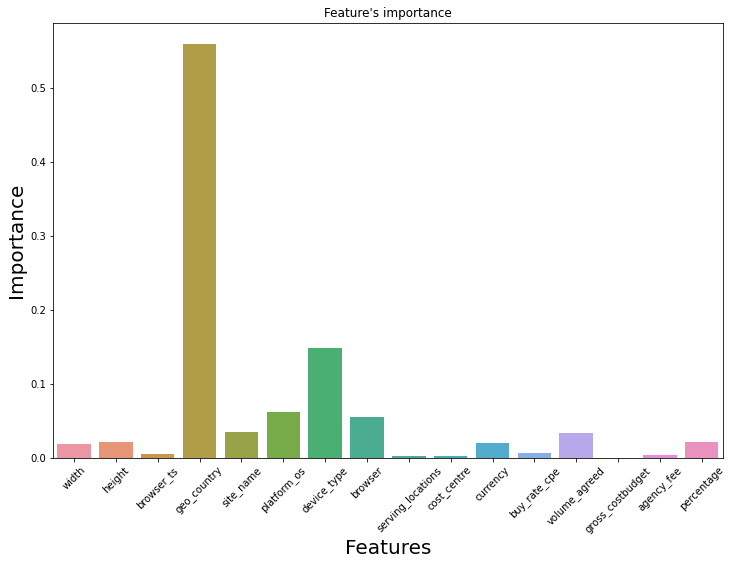

In [44]:
run_train_pipeline(model, x, y, 
                experiment_name='Random Forest with cleaned data',
                run_name='sixth_run')

In [45]:
model = RandomForestRegressor(n_estimators=20)
random_grid = { 
               'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

inside train pipeline
inside label encoder


2022-08-09 09:33:17,022:logger:successfully got catagorical columns
2022-08-09 09:33:17,025:logger:successfully got catagorical columns
2022-08-09 09:33:17,036:logger:successfully got numerical columns


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=True, max_depth=80, min_samples_leaf=1, min_samples_split=10; total time=  15.2s
[CV] END bootstrap=True, max_depth=80, min_samples_leaf=1, min_samples_split=10; total time=  16.2s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=4, min_samples_split=5; total time=  16.2s
[CV] END bootstrap=True, max_depth=80, min_samples_leaf=1, min_samples_split=10; total time=  17.6s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=4, min_samples_split=5; total time=  18.2s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=2; total time=  21.6s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=2; total time=  22.4s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=2; total time=  24.3s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=4, min_samples_split=5; total time=  15.1s
[CV] END bootstrap=False, max_depth=50, mi

2022-08-09 09:34:51,358:logger:RMSE Score: 0.45629829306549985
2022-08-09 09:34:51,360:logger:R2_Squared: 0.13189135043500388
2022-08-09 09:34:51,361:logger:MAE Score: 0.27897323313482986
2022-08-09 09:34:51,365:logger:Accuracy: 27.24 %.
2022-08-09 09:34:51,412:logger:feature importance plotted


Successfully registered model Random Forest with cleaned data_sixth_run_Sat-May-28-19:51:43-2022
Run - fine_tuned is logged to Experiment - Random Forest with cleaned data


{'RMSE Score': 0.46, 'R2_Squared': 0.13, 'MAE Score': 0.28}

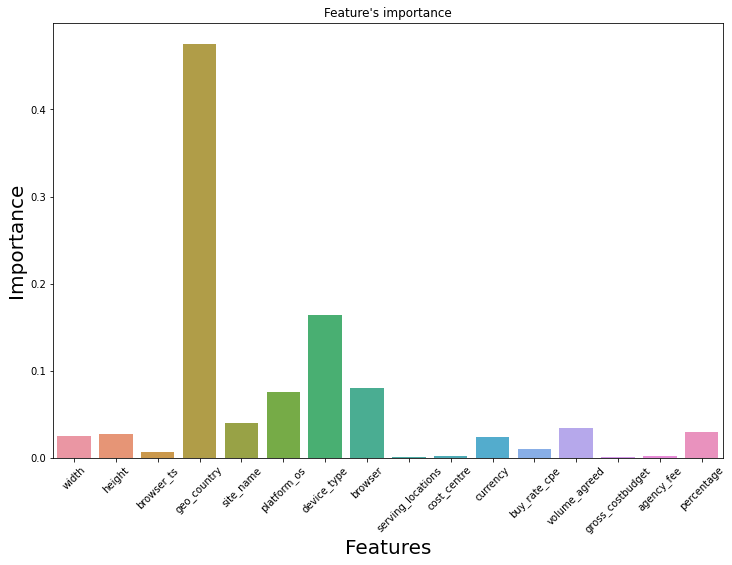

In [46]:
run_train_pipeline(rf_random, x, y, 
                experiment_name='Random Forest with cleaned data',
                run_name='fine_tuned')

In [24]:
model = XGBClassifier()
str(model)

'XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,\n              colsample_bynode=None, colsample_bytree=None,\n              enable_categorical=False, gamma=None, gpu_id=None,\n              importance_type=None, interaction_constraints=None,\n              learning_rate=None, max_delta_step=None, max_depth=None,\n              min_child_weight=None, missing=nan, monotone_constraints=None,\n              n_estimators=100, n_jobs=None, num_parallel_tree=None,\n              predictor=None, random_state=None, reg_alpha=None,\n              reg_lambda=None, scale_pos_weight=None, subsample=None,\n              tree_method=None, validate_parameters=None, verbosity=None)'

In [25]:
run_train_pipeline(model, x, y, 
                experiment_name='Random Forest with cleaned data',
                run_name='sixth_run')

inside train pipeline
inside label encoder


2022-08-09 08:51:06,547:logger:successfully got catagorical columns
2022-08-09 08:51:06,549:logger:successfully got catagorical columns
2022-08-09 08:51:06,561:logger:successfully got numerical columns
/home/hp/miniconda3/envs/airflow_env/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:51:07] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


2022-08-09 08:51:30,624:logger:RMSE Score: 0.5160395324394668
2022-08-09 08:51:30,627:logger:R2_Squared: -0.11578980605372347
2022-08-09 08:51:30,628:logger:MAE Score: 0.18497853399835848
2022-08-09 08:51:30,633:logger:Accuracy: 2.1 %.
2022-08-09 08:51:30,633:logger:'XGBClassifier' object has no attribute 'best_estimator_'
2022-08-09 08:51:30,634:logger:'list' object has no attribute 'keys'
2022-08-09 08:51:30,635:logger:'NoneType' object has no attribute 'savefig'


Run - sixth_run is logged to Experiment - Random Forest with cleaned data


{'RMSE Score': 0.52, 'R2_Squared': -0.12, 'MAE Score': 0.18}

In [26]:
model = DecisionTreeClassifier()
str(model)

'DecisionTreeClassifier()'

In [27]:
run_train_pipeline(model, x, y, 
                experiment_name='Decision Tree with cleaned data',
                run_name='platform_os_6_decision_tree')

inside train pipeline
inside label encoder


2022-08-09 08:54:02,773:logger:successfully got catagorical columns
2022-08-09 08:54:02,775:logger:successfully got catagorical columns
2022-08-09 08:54:02,787:logger:successfully got numerical columns
2022-08-09 08:54:03,861:logger:RMSE Score: 0.5351833102585192
2022-08-09 08:54:03,863:logger:R2_Squared: -0.19323672847201
2022-08-09 08:54:03,864:logger:MAE Score: 0.2043610707746701
2022-08-09 08:54:03,869:logger:Accuracy: 5.11 %.
2022-08-09 08:54:03,871:logger:'DecisionTreeClassifier' object has no attribute 'best_estimator_'
2022-08-09 08:54:03,872:logger:'list' object has no attribute 'keys'
2022-08-09 08:54:03,873:logger:'NoneType' object has no attribute 'savefig'


Run - platform_os_6_decision_tree is logged to Experiment - Decision Tree with cleaned data


{'RMSE Score': 0.54, 'R2_Squared': -0.19, 'MAE Score': 0.2}

In [21]:
# clf = KNeighborsClassifier(n_neighbors=3,algorithm='ball_tree')
model = KNeighborsClassifier()
str(model)

'KNeighborsClassifier()'

In [22]:
run_train_pipeline(model, x, y, 
                experiment_name='kneighbors Tree with cleaned data',
                run_name='platform_os_6_decision_tree')

inside train pipeline
inside label encoder


2022-08-09 09:03:08,826:logger:successfully got catagorical columns
2022-08-09 09:03:10,596:logger:successfully got catagorical columns
2022-08-09 09:03:10,607:logger:successfully got numerical columns


KeyboardInterrupt: 

In [23]:
from sklearn.svm import SVC
model = SVC(C=50,kernel='rbf',gamma=1) 
str(model)

'SVC(C=50, gamma=1)'

In [24]:
run_train_pipeline(model, x, y, 
                experiment_name='Decision Tree with cleaned data',
                run_name='platform_os_6_decision_tree')

inside train pipeline
inside label encoder


2022-08-09 09:09:06,503:logger:successfully got catagorical columns
2022-08-09 09:09:06,507:logger:successfully got catagorical columns
2022-08-09 09:09:06,519:logger:successfully got numerical columns


In [79]:
cleaned_warehouse.groupby(['campaign_id','type'])['type'].agg(all_data='count')

all_data
campaign_id type                         
12dc55z     click-through-event       660
            first_dropped            1196
            impression               8144
22yeess     click-through-event        98
            first_dropped             567
...                                   ...
z5cjizq     impression               7554
zqb4z95     click-through-event       227
            first_dropped             465
            impression               9308
zwgnbfr     impression                  2

[158 rows x 1 columns]

In [5]:
# cleaner = cleaned_warehouse[['campaign_id','type']].value_counts().sort_index()
cleaner = cleaned_warehouse.groupby(['campaign_id','type'])['type'].agg(count='count').reset_index() 
cleaner

,campaign_id,type,count
0,12dc55z,click-through-event,660
1,12dc55z,first_dropped,1196
2,12dc55z,impression,8144
3,22yeess,click-through-event,98
4,22yeess,first_dropped,567
...,...,...,...
153,z5cjizq,impression,7554
154,zqb4z95,click-through-event,227
155,zqb4z95,first_dropped,465
156,zqb4z95,impression,9308


In [6]:
campaigns = list(cleaner['campaign_id'].unique())

In [33]:
full_campaign_kpi = []
for c in campaigns:
    # print(c)
    # types = cleaner[cleaner['campaign_id'] == c]['type']
    types = list(cleaner[cleaner['campaign_id'] == c]['type'])
    ctr = 0
    er = 0
    tr = 0
    if 'impression' in types:
        impression_count = list(cleaner.query(f" campaign_id == '{c}' and type == 'impression'")['count'])[0]
        if 'first_dropped' in types:
            first_dropped_count = list(cleaner.query(f" campaign_id == '{c}' and type == 'first_dropped'")['count'])[0]
            er = (first_dropped_count/impression_count) * 100
        if 'click-through-event' in types:
            click_through_event_count = list(cleaner.query(f" campaign_id == '{c}' and type == 'click-through-event'")['count'])[0]
            ctr = (click_through_event_count/impression_count) * 100
            # count = cleaner[cleaner['campaign_id'] == c and cleaner['type'] == 'first_dropped']['count']
    tr = (er+ctr)/2
    full_campaign_kpi.append([c,er,ctr,tr])
full_campaign_kpi

[['12dc55z', 14.68565815324165, 8.104125736738704, 11.394891944990178],
 ['22yeess', 6.073915372254954, 1.049812533476165, 3.5618639528655596],
 ['2xh4kit', 5.617977528089887, 2.247191011235955, 3.932584269662921],
 ['2z6pk1p', 10.047793709014115, 1.1003667889296431, 5.574080248971879],
 ['3ej4hd8', 40.0, 0, 20.0],
 ['5qtwg2a', 18.216899534264805, 14.850299401197606, 16.533599467731207],
 ['73y46dg', 0, 0, 0.0],
 ['758ifo0', 13.83428713610351, 10.574769843244589, 12.20452848967405],
 ['8muucqy', 15.912834156847842, 10.781705308501204, 13.347269732674523],
 ['93abu9r', 20.536153467781602, 2.4348253812100347, 11.48548942449582],
 ['9xhmp81', 0, 0, 0.0],
 ['aok49ix', 9.17441726949133, 5.649328281088529, 7.41187277528993],
 ['b3sw44m', 3.6234902124114954, 0.49979175343606835, 2.061640982923782],
 ['bgo72sq', 13.06532663316583, 9.498713077583037, 11.282019855374433],
 ['cgzhgf9', 14.76640038731542, 6.269668361171629, 10.518034374243523],
 ['cnkabcs', 21.99329775350627, 2.122378056348517, 12

In [35]:
dataframe = pd.DataFrame(full_campaign_kpi,columns=['campaign_id','ER' , 'CTR', 'TR'])
dataframe

,campaign_id,ER,CTR,TR
0,12dc55z,14.685658,8.104126,11.394892
1,22yeess,6.073915,1.049813,3.561864
2,2xh4kit,5.617978,2.247191,3.932584
3,2z6pk1p,10.047794,1.100367,5.574080
4,3ej4hd8,40.000000,0.000000,20.000000
...,...,...,...,...
58,y7nfoz9,0.000000,4.405930,2.202965
59,yiiwsb9,2.113971,0.010212,1.062092
60,z5cjizq,19.526079,12.854117,16.190098
61,zqb4z95,4.995703,2.438762,3.717232


In [39]:
# df_cd = pd.merge(cleaned_warehouse, dataframe, how='inner')
df_cd
# cleaned_warehouse.shape

,campaign_id,game_key,type,width,height,creative_id,auction_id,browser_ts,geo_country,site_name,...,volume_agreed,gross_costbudget,agency_fee,percentage,flat_fee,net_cost,row_num,ER,CTR,TR
0,l5kk3r3,adunit-facebook-conversational-commerce-phase-...,impression,%,%,x83byc8a,fd74243f-6606-4830-a0ef-dd12f66ec6f5,2021-01-01 19:55:20.291000+00:00,Thailand,www.wuxiaworld.com,...,242185.0,67811.8,Percentage,15.0,None,57640.03,1,0.000000,0.000000,0.000000
1,l5kk3r3,adunit-facebook-conversational-commerce-phase-...,impression,%,%,x83byc8a,fd74243f-6606-4830-a0ef-dd12f66ec6f5,2021-01-01 19:55:20.298000+00:00,Thailand,www.wuxiaworld.com,...,242185.0,67811.8,Percentage,15.0,None,57640.03,1,0.000000,0.000000,0.000000
2,l5kk3r3,adunit-facebook-conversational-commerce-phase-...,impression,%,%,tf2htrrm,b3af878b-fd1a-4c6f-91a2-4e3670d2fda5,2021-01-05 00:21:39.693000+00:00,Thailand,www.prachachat.net,...,242185.0,67811.8,Percentage,15.0,None,57640.03,1,0.000000,0.000000,0.000000
3,l5kk3r3,adunit-facebook-conversational-commerce-phase-...,impression,%,%,x83byc8a,b7c22590-e784-43cf-874d-a661ad99601f,2021-01-06 09:30:44.188000+00:00,Thailand,www.prachachat.net,...,242185.0,67811.8,Percentage,15.0,None,57640.03,1,0.000000,0.000000,0.000000
4,l5kk3r3,adunit-facebook-conversational-commerce-phase-...,impression,%,%,x83byc8a,b7c22590-e784-43cf-874d-a661ad99601f,2021-01-06 09:30:45.047000+00:00,Thailand,www.prachachat.net,...,242185.0,67811.8,Percentage,15.0,None,57640.03,1,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422382,rom3zao,3c741855acd9576b4e311d5cd990ae77/ce493e9ed768f...,impression,300,250,b385e5s9,ca74860c-fa94-425b-b51a-9ef28ae7279e,2021-02-08 18:17:49.721000+00:00,United States,afk.guide,...,531179.0,212471.6,Percentage,0.0,None,212471.60,1,13.804589,9.560819,11.682704
422383,rom3zao,ccce5533b26203d07100376c394951a6/e69efe69bb576...,impression,300,250,s54usm6e,19618aa3-af95-44f2-beea-06958d0af730,2021-02-08 18:17:50.782000+00:00,United States,www.acommunaltable.com,...,531179.0,212471.6,Percentage,0.0,None,212471.60,1,13.804589,9.560819,11.682704
422384,rom3zao,676e0507f9e1ed8fa6880eafcf91547b/fee75db580219...,impression,300,250,aydslxzq,347bde1b-1b7b-4adf-8603-0dd1954466ee,2021-02-08 18:17:51.290000+00:00,United States,g1.globo.com,...,531179.0,212471.6,Percentage,0.0,None,212471.60,1,13.804589,9.560819,11.682704
422385,rom3zao,38534b16ec1e64274db67b5de478c86d/1184b78ee9795...,impression,300,250,18mljlwy,2440c057-02e7-4440-bcfb-15b113d1df18,2021-02-08 18:17:52.325000+00:00,United States,www.foxnews.com,...,531179.0,212471.6,Percentage,0.0,None,212471.60,1,13.804589,9.560819,11.682704


In [94]:
def cl(data):
    return pd.Series([1])
    pass
ty = pd.DataFrame()
ty['ty'] = cleaner['data']
ty

KeyError: 'type'